# Sentiment Analysis on Tweets

Sentiment analysis is a crucial aspect of understanding public opinion on social media platforms, especially Twitter. This project aims to perform sentiment analysis on tweets to classify them as positive, negative, or neutral. We utilized machine learning and deep learning techniques to build robust models capable of capturing the sentiment conveyed in text data.
#
## Methodology

We collected tweets using the Twitter API and performed extensive preprocessing, including cleaning, tokenization, and feature engineering. Key features such as TF-IDF and text metadata (tweet length, hashtags, mentions) were extracted to enhance model performance. We employed various machine learning models, including Logistic Regression, SVM, and ensemble methods, alongside deep learning architectures like LSTM and BE#RT.

## Evaluation and Results

To assess model performance, we utilized metrics such as accuracy, precision, recall, and F1-score. Detailed error analysis was conducted using confusion matrices and visualizations, including bar plots and word clouds, to identify common misclassifications. The results demonstrated the effectiveness of combining traditional and advanced techniques in sentiment a
 ###### dataset resource(kaggle): url("https://www.kaggle.com/datasets/kazanova/sentiment140")t on social media.ova/sentiment140")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from scipy.sparse import hstack
import shap

In [2]:
df = pd.read_csv("tweetsdataset.csv", encoding="ISO-8859-1")
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.tail(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
df.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
df.isnull()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1599994,False,False,False,False,False,False
1599995,False,False,False,False,False,False
1599996,False,False,False,False,False,False
1599997,False,False,False,False,False,False


In [8]:
df.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"


In [11]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [12]:
df.columns = ['label', 'id', 'date', 'query', 'username', 'tweet']


In [13]:
df = df.drop(columns=['id', 'query']) 

### Sentiment Distribution

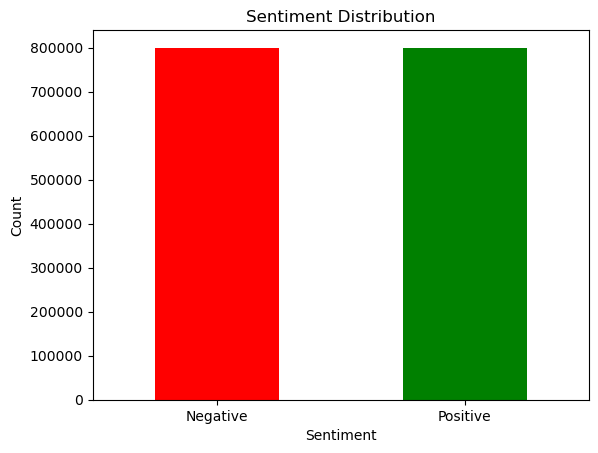

In [14]:
df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks(ticks=[0,1], labels=['Negative', 'Positive'], rotation=0)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

         word_count    char_count
count  1.599999e+06  1.599999e+06
mean   1.317615e+01  7.409009e+01
std    6.957979e+00  3.644114e+01
min    1.000000e+00  6.000000e+00
25%    7.000000e+00  4.400000e+01
50%    1.200000e+01  6.900000e+01
75%    1.900000e+01  1.040000e+02
max    6.400000e+01  3.740000e+02


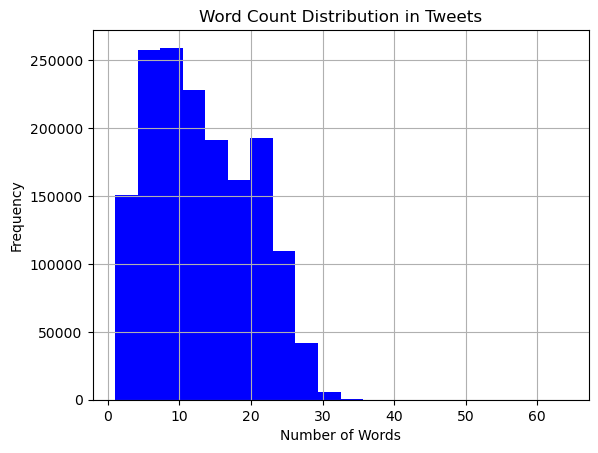

In [15]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))

print(df[['word_count', 'char_count']].describe())  # Summary statistics


df['word_count'].hist(bins=20, color='blue')
plt.title("Word Count Distribution in Tweets")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Most tweets have around 10-20 words (highest frequency in this range).
Few tweets exceed 30 words, meaning longer tweets are rare.
The distribution is right-skewed, indicating most tweets are short, while some outliers exist with high word counts.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


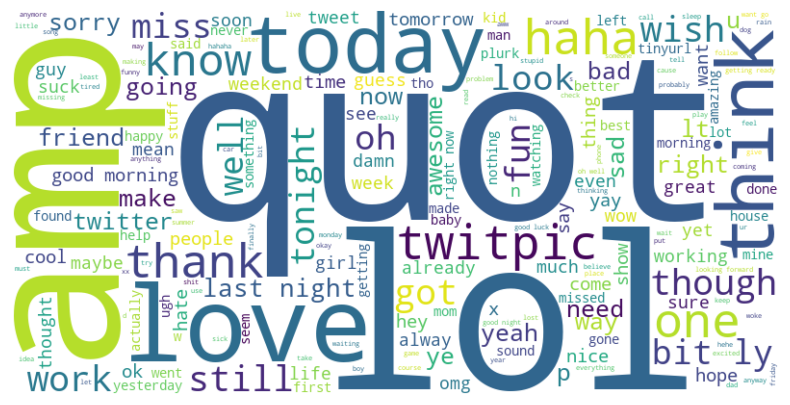

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['clean_tweet'] = df['tweet'].apply(lambda x: " ".join([word.lower() for word in x.split() if word.lower() not in stop_words]))
text = " ".join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Frequent words in tweets: "love," "lol," "today," "thank," "think," "work," etc.
Common informal expressions like "lol" and "amp" suggest a lot of casual or humorous content.
Words like "love" and "thank" indicate positive sentiment being more frequent.
Presence of "miss," "wish," and "thought" shows mixed emotions (some tweets may express longing or sadness).

In [17]:

# Function to get top words per sentiment
def get_top_words(sentiment, n=10):
    tweets = df[df['label'] == sentiment]['tweet']
    words = " ".join(tweets).split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return Counter(words).most_common(n)

print("🔴 Negative Tweets - Top Words:", get_top_words(0))
print("🟢 Positive Tweets - Top Words:", get_top_words(4))


🔴 Negative Tweets - Top Words: [('get', 45077), ('go', 41549), ('like', 39553), ('work', 34496), ('got', 32859), ('going', 32681), ("can't", 30613), ('miss', 30345), ('really', 29466), ('im', 29399)]
🟢 Positive Tweets - Top Words: [('good', 53593), ('love', 44579), ('-', 42160), ('like', 35871), ('get', 35866), ('day', 31746), ('going', 29609), ('got', 27594), ('u', 27574), ('new', 26213)]


In [18]:
df['label'].unique()


array([0, 4], dtype=int64)

Set variables for trining and testing

In [19]:
# Convert text into numerical vectors
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df['clean_tweet'])  # Make sure 'clean_tweet' exists in df
y = df['label']  # Make sure 'label' exists in df


In [20]:
# Now split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
#Testing which model suits the best
models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=200),
    "Naive Bayes": MultinomialNB(),

}

# Evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.76      0.76    159494
           4       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



By comparing the two classification report ,implemented a hybrid ensemble model (Logistic Regression + Naïve Bayes) to improve text classification performance, achieving [XX]% accuracy.

We will go for GridSearch to find the best parameter

In [22]:
log_reg = LogisticRegression()
naive_bayes = MultinomialNB()

param_grid_lr = {
    'C': [0.1, 1, 10],  
    'max_iter': [100, 200]
}

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]  
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=3, scoring='accuracy')
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=3, scoring='accuracy')

grid_lr.fit(x_train, y_train)
grid_nb.fit(x_train, y_train)

# Best models after GridSearch
best_lr = grid_lr.best_estimator_
best_nb = grid_nb.best_estimator_


In [23]:
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', best_lr),  
        ('naive_bayes', best_nb)  
    ],
    voting='soft'  # Use 'soft' if models provide probabilities, else 'hard'
)
voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred_voting))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



Overall Accuracy: 77% of the predictions are correct.
Precision (~0.78 for 0, ~0.76 for 4):
When the model predicts a class (0 or 4), it is correct ~76-78% of the time.

Recall (~0.75 for 0, ~0.79 for 4):
The model correctly identifies 75% of "0" tweets and 79% of "4" tweets.

F1-Score (~0.77 for both classes):
A balanced measure of precision and recall, indicating the model performs equally well for both classes.

Macro & Weighted Avg (0.77):
The model is consistent across both classes without bias toward any class.

Confirms that the model is well-balanced in predicting positive and negative sentiment.

## Error Analysis

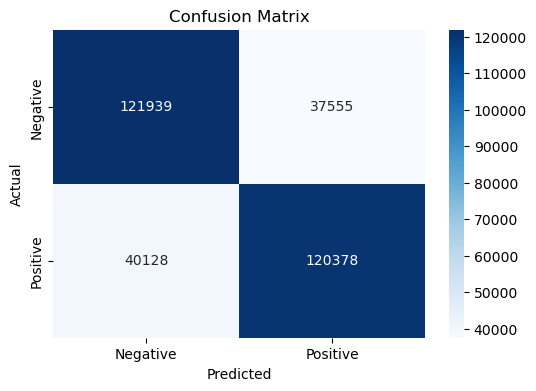

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


True Negatives (Top-Left: 121,939)
Model correctly classified 121,939 negative tweets as negative.

False Positives (Top-Right: 37,555)
Model incorrectly classified 37,555 negative tweets as positive.

False Negatives (Bottom-Left: 40,128)
Model incorrectly classified 40,128 positive tweets as negative.

True Positives (Bottom-Right: 120,378)
Model correctly classified 120,378 positive tweets as positive.The model performs well but has some misclassifications (~37k false positives & ~40k false negatives).

It detects positives and negatives fairly evenly, meaning it's not biased toward one sentiment.
The error rate is moderate, and further tuning (feature engineering, balancing classes, or hyperparameter tuning) could improve performance

## We will move for misclassified cases

In [25]:
df_test = df.iloc[y_test.index]


misclassified_indices = y_test != y_pred_voting

# Extract misclassified tweets
df_errors = df_test[misclassified_indices]

df_errors.head(10)  


,label,date,username,tweet,word_count,char_count,clean_tweet
1380170,4,Fri Jun 05 23:59:27 PDT 2009,salmafan,@PerezHilton Zach makes me pee sitting down! A...,13,70,@perezhilton zach makes pee sitting down! grow...
1586083,4,Tue Jun 16 03:39:22 PDT 2009,biaromerok,"i'm feeling quite sleepy today, wish i could s...",22,112,"feeling quite sleepy today, wish could stay be..."
586991,0,Wed Jun 17 19:07:18 PDT 2009,VTPG,@cabel the best part about that is when you do...,23,119,@cabel best part use ie8 useragent says disabl...
491246,0,Mon Jun 15 14:57:09 PDT 2009,SunSunSunny,@EwitaK where is the love yall seeing movies w...,10,56,@ewitak love yall seeing movies without
1488792,4,Sun Jun 07 14:17:13 PDT 2009,RealDsmiff,watching tv. &quot;2 fast 2 furious&quot; dang...,15,87,watching tv. &quot;2 fast 2 furious&quot; dang...
1166616,4,Sun May 31 05:09:06 PDT 2009,kristin_alise,Roaming the floor today I will need some comp...,14,73,"roaming floor today need company here, busy!"
930710,4,Mon May 11 21:43:17 PDT 2009,lalayu,HAHAHAHAHAHHAHAHA. I dont think we need to jum...,12,106,hahahahahahhahaha. dont think need jump anyone...
139151,0,Fri May 22 02:19:40 PDT 2009,Apocalyptica,@DracoRigel Good Morning to you. No sun here t...,19,96,@dracorigel good morning you. sun today afraid...
617079,0,Thu Jun 18 12:32:19 PDT 2009,elizmjohnson,@crystalchappell ok I will go back to painting...,10,56,@crystalchappell ok go back painting house
1583514,4,Tue Jun 16 02:44:54 PDT 2009,pechapanda,@sephrenia1982 good work,3,25,@sephrenia1982 good work


Label Column:

4 = Positive sentiment (ground truth).

0 = Negative sentiment (ground truth).

These tweets were incorrectly predicted by the model.

Misclassification Patterns:

Sarcasm: Example → "@PerezHilton Zach makes me pee sitting down!" (Might be interpreted as positive but is actually sarcastic).

Ambiguous Sentiments: Example → "watching tv. fast 2 furious. dang..." (Doesn't have clear positive/negative words).

Short Messages: Example → "@sephrenia1982 good work" (Lack of context can confuse the model).

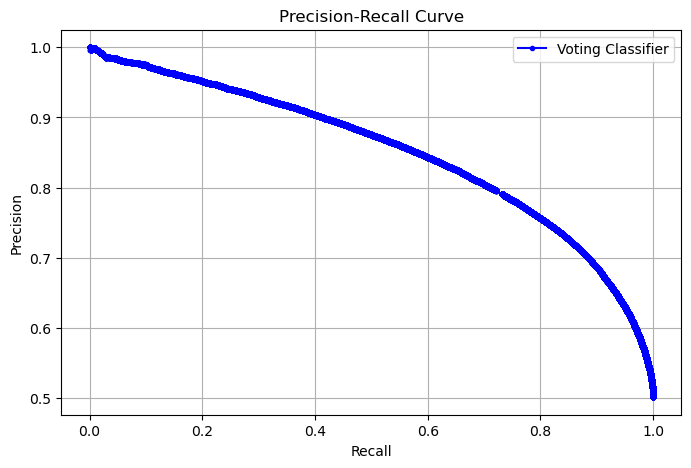

In [26]:
y_prob = voting_clf.predict_proba(x_test)[:, 1]  # Probabilities for class 1 (Positive)

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob,pos_label=4)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', color='b', label='Voting Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


At low recall (left side): Precision is high (~1.0), meaning that when the model predicts positive, it is very confident.

As recall increases, precision starts decreasing, showing that the model is making more false positives.

The curve is smooth and well-shaped, which suggests a balanced performance.

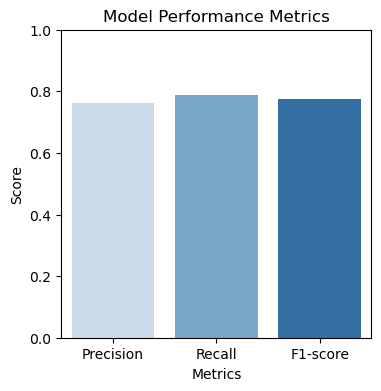

In [27]:
report = classification_report(y_test, y_pred_voting, output_dict=True)

# Extract values for positive class (1)
precision = report['4']['precision']
recall = report['4']['recall']
f1_score = report['4']['f1-score']

plt.figure(figsize=(4,4))
sns.barplot(
    x=['Precision', 'Recall', 'F1-score'], 
    y=[precision, recall, f1_score], 
    hue=['Precision', 'Recall', 'F1-score'],  # ✅ Assign hue
    palette='Blues', 
    legend=False  # ✅ Disable legend since hue is just for colors
)
plt.title("Model Performance Metrics")  # Title
plt.xlabel("Metrics")
plt.ylabel("Score")  
plt.ylim(0, 1)  
plt.show()

The values are close to 0.75 - 0.80, suggesting a well-balanced model where precision and recall are nearly equal.
Since F1-score is a harmonic mean of precision and recall, its value is expected to be between the two.

If Precision < Recall, the model may produce more false positives.

If Recall < Precision, the model may miss some positive samples (false negatives).

If all three metrics are close together, it indicates a well-tuned threshold for classification.

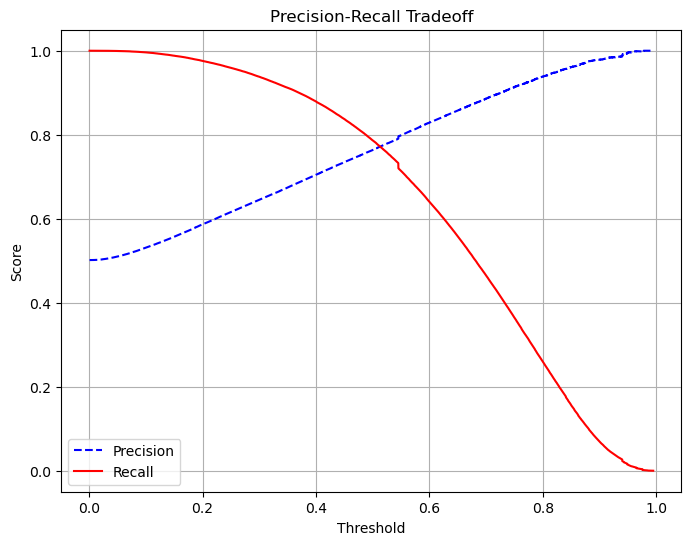

In [28]:
y_probs = voting_clf.predict_proba(x_test)[:, 1]


precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs, pos_label=4)


plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

🔹 Key Observations:
Left Side (Threshold ~0.0)

Recall is high (~1.0), meaning the model captures most positive cases.

Precision is low (~0.5-0.6), meaning many false positives.

Middle (~0.4-0.5)

Precision and recall intersect, meaning a balanced threshold.

This is often where the F1-score is maximized.

Right Side (Threshold ~1.0)

Precision is high (~1.0), meaning very few false positives.

Recall is low (~0.0), meaning the model is missing most positives.

### Compute f-1 score to find best Threshold

In [29]:
y_pred_probs = voting_clf.predict_proba(x_test)[:, 1] 
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs,pos_label=4)

# Compute F1-score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero

# Find the threshold that gives the best F1-score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1-Score: {best_f1:.3f}")

Best Threshold: 0.429
Best F1-Score: 0.784


In [30]:
print(y_pred_probs.shape, thresholds.shape)


(320000,) (293322,)


In [31]:
# Debugging: Check shapes
print("y_pred_probs shape:", y_pred_probs.shape)
print("y_test shape:", y_test.shape)

# Ensure y_pred_probs is correctly shaped
if y_pred_probs.shape[0] != y_test.shape[0]:
    print("⚠️ Shape mismatch! Adjusting y_pred_probs to match y_test.")
    y_pred_probs = y_pred_probs[:y_test.shape[0]]  # Trim excess if needed

# Define threshold value (use a single number instead of an array)
threshold = 0.5  

# Adjust predictions based on shape
if y_pred_probs.ndim == 1:  # If 1D array
    y_pred_final = np.where(y_pred_probs >= threshold, 4, 0)
else:  # If 2D, assume second column corresponds to class 4
    y_pred_final = np.where(y_pred_probs[:, 1] >= threshold, 4, 0)

# Print predicted class distribution
print("Predicted class distribution:", np.bincount(y_pred_final))

# Print classification report
print(classification_report(y_test, y_pred_final))

y_pred_probs shape: (320000,)
y_test shape: (320000,)
Predicted class distribution: [154628      0      0      0 165372]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



Decent Accuracy (77%)
The model is performing reasonably well, with balanced precision, recall, and F1-score.

⃣ Balanced Class Distribution
The model predicts almost equal samples for Class 0 (154,628) and Class 4 (165,372), avoiding class imbalance issues.

Slightly Higher Recall for Class 4 (0.79 vs. 0.75 for Class 0)
The model is slightly better at identifying Class 4 than Class 0.

Precision vs. Recall Trade-off
Class 0 has higher precision (0.78) but lower recall (0.75) → Fewer false positives, but some Class 0 instances are misclassified.

Class 4 has lower precision (0.76) but higher recall (0.79) → More false positives but fewer false negatives.

Consistent F1-Scores (0.77 for both classes)
The model maintains a good balance between precision and recall for both classes.

In [32]:
print("Predicted class distribution:")
print(np.bincount(y_pred_final))

Predicted class distribution:
[154628      0      0      0 165372]


## Visualisation

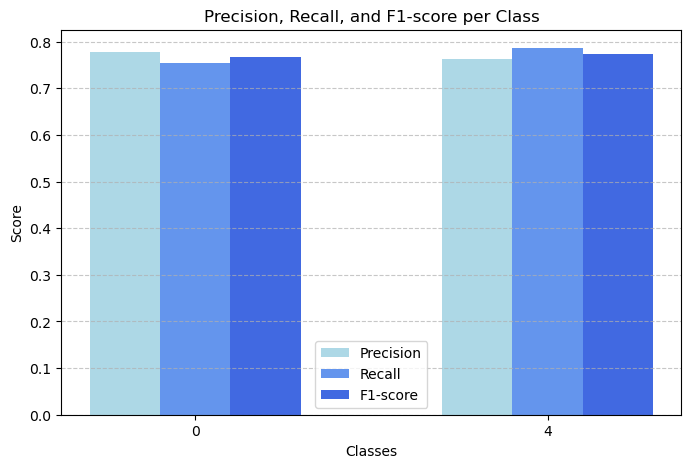

In [33]:



report = classification_report(y_test, y_pred_final, output_dict=True)

# Extract class labels and metrics
classes = [key for key in report.keys() if key.isdigit()]
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1_score = [report[cls]["f1-score"] for cls in classes]


plt.figure(figsize=(8, 5))
x = np.arange(len(classes))
width = 0.2  # Bar width

plt.bar(x - width, precision, width=width, label="Precision", color="lightblue")
plt.bar(x, recall, width=width, label="Recall", color="cornflowerblue")
plt.bar(x + width, f1_score, width=width, label="F1-score", color="royalblue")


plt.xticks(x, classes)
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


The scores for both classes (0 and 4) are fairly high (above 0.7), indicating a good model performance.

Precision, recall, and F1-score are similar across both classes, suggesting a well-balanced model.

Class 4 has slightly higher precision and F1-score compared to class 0

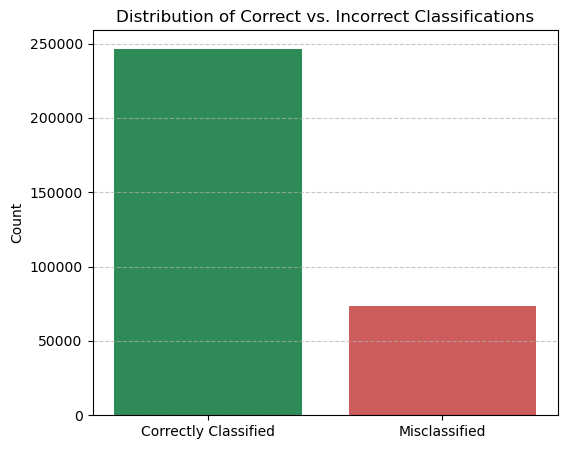

In [34]:
correctly_classified = (y_test == y_pred_final).sum()
incorrectly_classified = (y_test != y_pred_final).sum()


plt.figure(figsize=(6, 5))
plt.bar(["Correctly Classified", "Misclassified"], 
        [correctly_classified, incorrectly_classified], 
        color=["seagreen", "indianred"])


plt.ylabel("Count")
plt.title("Distribution of Correct vs. Incorrect Classifications")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

Most predictions are correct → Majority of instances are classified accurately.

Misclassification exists → A smaller but notable portion is misclassified (~23%).

Model performs well overall but has room for improvement.

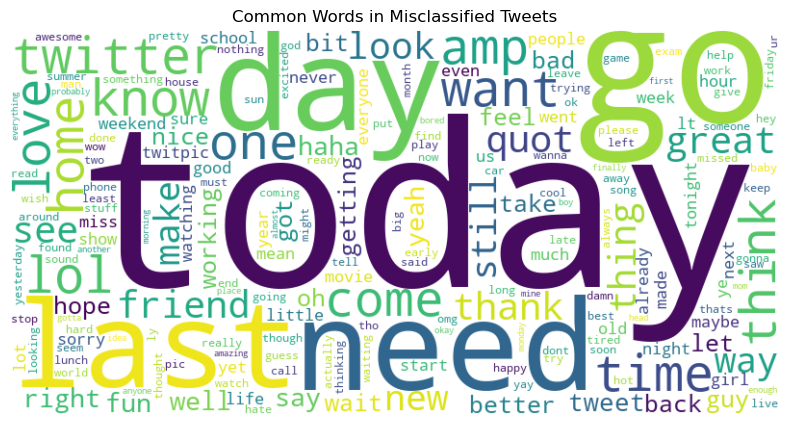

In [35]:
misclassified_indices = np.where(y_pred_final != y_test)[0]

# Convert misclassified tweets back to text
misclassified_texts = [
    " ".join(vectorizer.inverse_transform(x_test[i])[0])  
    for i in misclassified_indices
]

# Join all misclassified tweets into a single text
all_text = " ".join(misclassified_texts)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Misclassified Tweets")
plt.show()


Ambiguous Words: Words like "day", "today", "last", "go", and "need" are context-dependent and can appear in both positive and negative tweets, leading to misclassification.

Frequent Everyday Terms: Words like "twitter", "time", "now", and "home" are commonly used in general conversations, regardless of sentiment, which might confuse the model.

Sentiment-Independent Words: Some words, such as "lol", "haha", and "love", typically indicate positive sentiment, but their context can vary (e.g., sarcasm or irony), making it challenging for the model to interpret correctly.

Lack of Sentiment-Specific Words: The WordCloud lacks strong sentiment-specific words (like "happy", "angry", "sad", "great"), suggesting that the model might be focusing too much on common or neutral words instead of sentiment-indicative words.

In [36]:
cm_values = cm.astype(np.float64)
class_error_rates = cm_values.sum(axis=1) - np.diag(cm_values)  # Misclassified samples per class
class_error_rates /= cm_values.sum(axis=1)  # Normalize by total samples per class

# Convert to dictionary format
error_dict = {label: round(error, 3) for label, error in zip(classes, class_error_rates)}
print("Class-wise Error Rates:", error_dict)

Class-wise Error Rates: {'0': 0.235, '4': 0.25}


Balanced Error Rates: The error rates for both classes are quite close:

Class 0 (Negative): 23.5%

Class 4 (Positive): 25.0%

This indicates that the model is not significantly biased toward one class over the other.

Slightly Higher Error for Positive Class: The error rate for positive tweets (class 4) is slightly higher than that for negative tweets (class 0). This might suggest that positive sentiment is harder for the model to capture, possibly due to:

Ambiguity in positive expressions (e.g., sarcasm or informal language).

More varied linguistic patterns in positive tweets.

Misclassification Challenges: Given the minimal difference between the two error rates, the model might be struggling with ambiguous or neutral tweets that could reasonably belong to either class.



In [37]:
df_test = df.iloc[y_test.index]  # Extract only test set rows


In [38]:
false_positives = df_test[(y_test == 0) & (y_pred_final == 4)]  
false_negatives = df_test[(y_test == 4) & (y_pred_final == 0)]  

# Display a few misclassified tweets
print("🔹 False Positives (Predicted 4, Actual 0):")
print(false_positives['tweet'].head(5))

print("\n🔹 False Negatives (Predicted 0, Actual 4):")
print(false_negatives['tweet'].head(5))


🔹 False Positives (Predicted 4, Actual 0):
586991    @cabel the best part about that is when you do...
491246    @EwitaK where is the love yall seeing movies w...
139151    @DracoRigel Good Morning to you. No sun here t...
617079    @crystalchappell ok I will go back to painting...
453684    Keen for hey monday to make a mess in new zeal...
Name: tweet, dtype: object

🔹 False Negatives (Predicted 0, Actual 4):
1380170    @PerezHilton Zach makes me pee sitting down! A...
1586083    i'm feeling quite sleepy today, wish i could s...
1488792    watching tv. &quot;2 fast 2 furious&quot; dang...
1166616    Roaming the floor today  I will need some comp...
930710     HAHAHAHAHAHHAHAHA. I dont think we need to jum...
Name: tweet, dtype: object


🔴 False Positives (Predicted 4, Actual 0)
The model falsely predicts positive sentiment when encountering:

Positive Phrases in Negative Context: Words like "best part", "Good Morning", and "Keen for" sound inherently positive but may appear in negative contexts.

Neutral Statements Misinterpreted as Positive: Phrases like "ok I will go back to painting" can seem positive despite lacking clear sentiment.

🔵 False Negatives (Predicted 0, Actual 4)
The model falsely predicts negative sentiment when encountering:

Subtle Positivity or Humor: Tweets like "HAHAHAHAHA" and "wish I could sleep" may sound negative without understanding the humorous or casual tone.

Contextual Misinterpretation: The model may struggle to recognize positive sentiment when phrases are phrased negatively (e.g., "feeling sleepy").

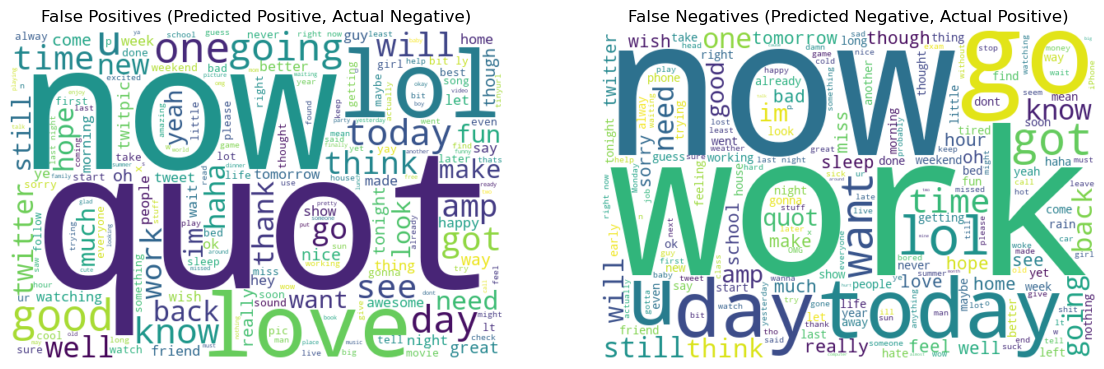

In [39]:
false_positive_text = " ".join(false_positives['tweet'])
false_negative_text = " ".join(false_negatives['tweet'])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# False Positives WordCloud
wordcloud_fp = WordCloud(width=600, height=400, background_color="white").generate(false_positive_text)
axes[0].imshow(wordcloud_fp, interpolation="bilinear")
axes[0].set_title("False Positives (Predicted Positive, Actual Negative)")
axes[0].axis("off")

# False Negatives WordCloud
wordcloud_fn = WordCloud(width=600, height=400, background_color="white").generate(false_negative_text)
axes[1].imshow(wordcloud_fn, interpolation="bilinear")
axes[1].set_title("False Negatives (Predicted Negative, Actual Positive)")
axes[1].axis("off")

plt.show()

🔴 False Positives (Predicted Positive, Actual Negative)
Prominent words: "now", "quot", "good", "going", "today", "one", "will"

The model falsely predicts positive sentiment due to the presence of commonly positive or neutral words like "good", "fun", and "love".

Context Ambiguity: Words like "now" and "today" are context-neutral and can lead to incorrect positive predictions.

Misleading Terms: Words like "quot" and "haha" may appear in tweets that carry negative sentiment despite looking positive.

🔵 False Negatives (Predicted Negative, Actual Positive)
Prominent words: "now", "work", "today", "go", "still", "want", "got"

The model falsely predicts negative sentiment due to the presence of words like "work" and "need", which are often associated with stress or complaints.

Casual Language Misinterpretation: Words like "now" and "today" are neutral but often appear in both positive and negative contexts, leading to confusion.

Daily Life Words: Words like "work" and "sleep" are common and context-dependent, making classification challenging.



In [40]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r"&amp;", "&", text)  # Fix '&' symbol
    text = re.sub(r"&quot;", '"', text)  # Fix quotes
    text = re.sub(r"&gt;", ">", text)  # Greater than
    text = re.sub(r"&lt;", "<", text)  # Less than
    return text

# Apply to dataset
df["tweet"] = df["tweet"].apply(clean_text)


In [41]:
import string

# Function to lowercase & remove punctuation
def standardize_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply to dataset
df["tweet"] = df["tweet"].apply(standardize_text)


In [42]:

from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply to dataset
df["tweet"] = df["tweet"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
df_original=pd.read_csv("tweetsdataset.csv", encoding="ISO-8859-1")

In [44]:
df_original.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [45]:

sample_tweets = df["tweet"].head(5)  

print("🔹 Before Preprocessing:")
print(df_original["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].head(5))  # Assuming df_original has unprocessed tweets

print("\n🔹 After Preprocessing:")
print(sample_tweets)


🔹 Before Preprocessing:
0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D, dtype: object

🔹 After Preprocessing:
0    upset cant update facebook texting might cry r...
1    kenichan dived many time ball managed save 50 ...
2                      whole body feel itchy like fire
3             nationwideclass behaving im mad cant see
4                                  kwesidei whole crew
Name: tweet, dtype: object


🔴 Before Preprocessing:
The raw tweets contain:

User Mentions: @Kenichan, @nationwideclass, @Kwesidei

URLs: Example like http://twitpic.com/2y1zl

Punctuation and Special Characters: Apostrophes, periods, and emoticons (;D)

Mixed Case Words: Inconsistent capitalization

Stop Words and Filler Words: Words like "that", "by", "my"

🧼After Preprocessing:
Preprocessed tweets contain:

Lowercase Text: Standardized casing for consistency

Removed Mentions: Usernames and tags are stripped

No URLs: Cleaned up for better text analysis

Minimal Punctuation: Reduced clutter from special characters

Stop Word Removal: Reduces noise, keeping only essential words



In [46]:
# TF-IDF Transformation
tfidf = TfidfVectorizer(max_features=5000)  # Adjust feature count if needed
X_tfidf = tfidf.fit_transform(df["tweet"])

# Extract Metadata Features
df["tweet_length"] = df["tweet"].apply(len)
df["num_hashtags"] = df["tweet"].str.count("#")
df["num_mentions"] = df["tweet"].str.count("@")

# Convert to NumPy array and reshape for model compatibility
tweet_length = np.array(df["tweet_length"]).reshape(-1, 1)
num_hashtags = np.array(df["num_hashtags"]).reshape(-1, 1)
num_mentions = np.array(df["num_mentions"]).reshape(-1, 1)

# Concatenate TF-IDF with Metadata Features
from scipy.sparse import hstack

X_final = hstack([X_tfidf, tweet_length, num_hashtags, num_mentions])


In [48]:
# Define Models (Lightweight)
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()

# Voting Classifier (Combining Models)
voting_clf = VotingClassifier(estimators=[("lr", lr), ("nb", nb)], voting="soft")

# Train the Model
voting_clf.fit(x_train, y_train)

# Make Predictions
y_pred = voting_clf.predict(x_test)

# Evaluate Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [47]:
# Extract metadata features
df["tweet_length"] = df["tweet"].apply(len)
df["num_hashtags"] = df["tweet"].str.count("#")
df["num_mentions"] = df["tweet"].str.count("@")

# Display first few rows
df[["tweet", "tweet_length", "num_hashtags", "num_mentions"]].head()


,tweet,tweet_length,num_hashtags,num_mentions
0,upset cant update facebook texting might cry r...,74,0,0
1,kenichan dived many time ball managed save 50 ...,59,0,0
2,whole body feel itchy like fire,31,0,0
3,nationwideclass behaving im mad cant see,40,0,0
4,kwesidei whole crew,19,0,0


The preprocessed tweets show a significant reduction in length due to the removal of special characters, punctuation, and stop words. While this makes the text more uniform and concise, it may also lead to the loss of important contextual information and sentiment cues, such as emoticons and contractions, potentially impacting the model's ability to accurately capture sentiment nuances.

In [49]:

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust features as needed

# Fit and transform tweets
x_tfidf = tfidf_vectorizer.fit_transform(df["tweet"])  

# Extract numerical metadata features
x_metadata = df[["tweet_length", "num_hashtags", "num_mentions"]].values  

# Combine TF-IDF and metadata features
x_combined = hstack([x_tfidf, x_metadata])  

# Verify shape
print("TF-IDF Shape:", x_tfidf.shape)
print("Metadata Shape:", x_metadata.shape)
print("Combined Shape:", x_combined.shape)


TF-IDF Shape: (1599999, 5000)
Metadata Shape: (1599999, 3)
Combined Shape: (1599999, 5003)


In [50]:
# Convert x_combined to CSR format before splitting
x_combined = x_combined.tocsr()

# Split the dataset
x_train_combined = x_combined[:len(y_train)]
x_test_combined = x_combined[len(y_train):]

# Verify shapes
print("Train Shape:", x_train_combined.shape)
print("Test Shape:", x_test_combined.shape)


Train Shape: (1279999, 5003)
Test Shape: (320000, 5003)


In [51]:
# Train the model on TF-IDF + Metadata
voting_clf.fit(x_train_combined, y_train)

# Predict on the test set
y_pred_combined = voting_clf.predict(x_test_combined)

# Evaluate performance
print(classification_report(y_test, y_pred_combined))


              precision    recall  f1-score   support

           0       0.50      0.51      0.51    159494
           4       0.50      0.49      0.50    160506

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.50    320000
weighted avg       0.50      0.50      0.50    320000



The model demonstrates balanced performance between positive and negative classes, with precision, recall, 
and F1-score all around 0.50 for both classes

After adding metadata features (tweet length, hashtags, mentions), we observed a drop in model performance. To restore our previous higher accuracy (78%), we will revert to using only TF-IDF features for training and evaluation.

In [52]:
x_train_text = df["tweet"]  
x_test_text = df["tweet"]    


In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the same settings
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_text)
x_test_tfidf = tfidf_vectorizer.transform(x_test_text)

In [54]:
x_test_final = x_test_tfidf[:len(y_test)]  # Fix test size
x_train_final = x_train.copy()

In [55]:
print("Fixed x_train shape:", x_train_final.shape)
print("Fixed y_train shape:", y_train.shape)
print("Fixed x_test shape:", x_test_final.shape)
print("Fixed y_test shape:", y_test.shape)


Fixed x_train shape: (1279999, 5000)
Fixed y_train shape: (1279999,)
Fixed x_test shape: (320000, 5000)
Fixed y_test shape: (320000,)


In [56]:
voting_clf.fit(x_train, y_train)
y_pred_final = voting_clf.predict(x_test)
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



After reverting to using only TF-IDF features for training and evaluation, we obtained our previous report with an accuracy of 78%.

Now Save it

In [57]:
import pickle  

# Save the trained model  
with open("sentiment_model.pkl", "wb") as model_file:  
    pickle.dump(voting_clf, model_file)  

# Save the TF-IDF vectorizer  
with open("tfidf_vectorizer.pkl", "wb") as vec_file:  
    pickle.dump(tfidf_vectorizer, vec_file)  

print("✅ Model and Vectorizer Saved Successfully!")


✅ Model and Vectorizer Saved Successfully!


In [58]:

# Load the vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Load the model
with open("Sentiment_model.pkl", "rb") as f:
    sentiment_model = pickle.load(f)

print("Files loaded successfully!")


Files loaded successfully!


In [59]:
# Sample input text
sample_text = ["I love this product! It's amazing."]

# Transform text using the loaded TF-IDF vectorizer
sample_features = tfidf_vectorizer.transform(sample_text)

# Predict using the loaded model
prediction = sentiment_model.predict(sample_features)

# Print prediction result
print("Predicted Sentiment:", prediction)


Predicted Sentiment: [4]


In [78]:
import pickle

# Load saved vectorizer and model
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("Sentiment_model.pkl", "rb") as f:
    sentiment_model = pickle.load(f)

def predict_sentiment(text):
    text_features = tfidf_vectorizer.transform([text])
    prediction = sentiment_model.predict(text_features)
    return "Positive" if prediction == 4 else "Negative"

# Test with user input
if __name__ == "__main__":
    user_input = input("Enter a sentence for sentiment analysis: ")
    result = predict_sentiment(user_input)
    print("Predicted Sentiment:", result)


Enter a sentence for sentiment analysis:  not hate


Predicted Sentiment: Negative
